In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings # Supress warnings 
import plotly.graph_objects as go
warnings.filterwarnings('ignore') 

In [58]:
validation_start_date = "2003-05-01"
test_start_date = "2011-05-01"

In [59]:
data = pd.read_csv('economics.csv', index_col="date", parse_dates=True)
data = data.drop(columns=["Unnamed: 0"])
data["pce_diff_1"] = data["pce"].diff()
data["pce_lag_1"] = data["pce"].shift(1)
data.fillna(method="bfill", inplace=True)
data

,pce,pop,psavert,uempmed,unemploy,pce_diff_1,pce_lag_1
date,,,,,,,
1967-07-01,506.7,198712.000,12.6,4.5,2944,3.1,506.7
1967-08-01,509.8,198911.000,12.6,4.7,2945,3.1,506.7
1967-09-01,515.6,199113.000,11.9,4.6,2958,5.8,509.8
1967-10-01,512.2,199311.000,12.9,4.9,3143,-3.4,515.6
1967-11-01,517.4,199498.000,12.8,4.7,3066,5.2,512.2
...,...,...,...,...,...,...,...
2014-12-01,12062.0,319746.157,7.6,12.9,8717,10.6,12051.4
2015-01-01,12046.0,319928.646,7.7,13.2,8903,-16.0,12062.0
2015-02-01,12082.4,320074.511,7.9,12.9,8610,36.4,12046.0


In [60]:
y = pd.DataFrame(data["pce_diff_1"])
X = data.drop(columns=["pce_diff_1","pce"])
X

,pop,psavert,uempmed,unemploy,pce_lag_1
date,,,,,
1967-07-01,198712.000,12.6,4.5,2944,506.7
1967-08-01,198911.000,12.6,4.7,2945,506.7
1967-09-01,199113.000,11.9,4.6,2958,509.8
1967-10-01,199311.000,12.9,4.9,3143,515.6
1967-11-01,199498.000,12.8,4.7,3066,512.2
...,...,...,...,...,...
2014-12-01,319746.157,7.6,12.9,8717,12051.4
2015-01-01,319928.646,7.7,13.2,8903,12062.0
2015-02-01,320074.511,7.9,12.9,8610,12046.0


In [61]:
def sin_cos_transform(series, divisor=-1):
    """
    Apply sin cos transformation to get cyclical features.

    Args:
        series (iterable): Series to transform
        divisor (int): Divisor value. If it doesn't set, function gets max value of series.

    Returns:
        - sin_values (list) - Sin transformed values
        - cos_values (list) - Cos transformed values
    """
    if divisor == -1:
        divisor = series.max()
    sin_values = [math.sin((2 * math.pi * x) / divisor) for x in list(series)]
    cos_values = [math.cos((2 * math.pi * x) / divisor) for x in list(series)]
    return sin_values, cos_values


In [62]:
X['pce_diff_1_lag1'] = y['pce_diff_1'].shift(1)
X['pce_diff_1_lag2'] = y['pce_diff_1'].shift(2)
X['pce_diff_1_lag3'] = y['pce_diff_1'].shift(3)
X['pop_lag1'] = X['pop'].shift(1)
X["pop_diff_1"] = X["pop"].diff()
X['pop_diff_1_lag1'] = X['pop_diff_1'].shift(1)
X["pop_diff_2"] = X["pop_diff_1"].diff()
X['psavert_lag1'] = X['psavert'].shift(1)
X['psavert_diff1'] = X['psavert'].diff()
X['psavert_lag2'] = X['psavert'].shift(2)
X['psavert_lag3'] = X['psavert'].shift(3)
X['psavert_lag4'] = X['psavert'].shift(4)
X['uempmed_lag_1'] = X['uempmed'].shift(1)
X['uempmed_diff_1'] = X['uempmed'].diff()
X['uempmed_lag12'] = X['uempmed'].shift(12)
X['uempmed_lag24'] = X['uempmed'].shift(24)

X['unemploy_lag_1'] = X['unemploy'].shift(1)
X['unemploy_diff_1'] = X['unemploy'].diff()
X['unemploy_lag_7'] = X['unemploy'].shift(7)


# time related
X["month_cos"], X["month_sin"] = sin_cos_transform(X.index.month, divisor=11)
X["quarter_cos"], X["quarter_sin"] = sin_cos_transform(X.index.quarter, divisor=11)
X["season_cos"], X["season_sin"] = sin_cos_transform(X.index.month % 12 // 3 + 1, divisor=11)



X

,pop,psavert,uempmed,unemploy,pce_lag_1,pce_diff_1_lag1,pce_diff_1_lag2,pce_diff_1_lag3,pop_lag1,pop_diff_1,...,uempmed_lag24,unemploy_lag_1,unemploy_diff_1,unemploy_lag_7,month_cos,month_sin,quarter_cos,quarter_sin,season_cos,season_sin
date,,,,,,,,,,,,,,,,,,,,,
1967-07-01,198712.000,12.6,4.5,2944,506.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-7.557496e-01,-0.654861,0.989821,-0.142315,0.989821,-0.142315
1967-08-01,198911.000,12.6,4.7,2945,506.7,3.1,NaN,NaN,198712.000,199.000,...,NaN,2944.0,1.0,NaN,-9.898214e-01,-0.142315,0.989821,-0.142315,0.989821,-0.142315
1967-09-01,199113.000,11.9,4.6,2958,509.8,3.1,3.1,NaN,198911.000,202.000,...,NaN,2945.0,13.0,NaN,-9.096320e-01,0.415415,0.989821,-0.142315,0.755750,-0.654861
1967-10-01,199311.000,12.9,4.9,3143,515.6,5.8,3.1,3.1,199113.000,198.000,...,NaN,2958.0,185.0,NaN,-5.406408e-01,0.841254,0.755750,-0.654861,0.755750,-0.654861
1967-11-01,199498.000,12.8,4.7,3066,512.2,-3.4,5.8,3.1,199311.000,187.000,...,NaN,3143.0,-77.0,NaN,-1.133108e-15,1.000000,0.755750,-0.654861,0.755750,-0.654861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-01,319746.157,7.6,12.9,8717,12051.4,28.4,65.6,13.1,319564.209,181.948,...,17.7,9090.0,-373.0,9859.0,5.406408e-01,0.841254,0.755750,-0.654861,0.540641,0.841254
2015-01-01,319928.646,7.7,13.2,8903,12062.0,10.6,28.4,65.6,319746.157,182.489,...,15.8,8717.0,186.0,9460.0,5.406408e-01,0.841254,0.540641,0.841254,0.540641,0.841254
2015-02-01,320074.511,7.9,12.9,8610,12046.0,-16.0,10.6,28.4,319928.646,145.865,...,17.2,8903.0,-293.0,9608.0,9.096320e-01,0.415415,0.540641,0.841254,0.540641,0.841254


In [63]:
sp = pd.read_csv("sp.csv", thousands=',', index_col="Date", parse_dates=True)
house = pd.read_csv("ASPUS.csv", index_col="DATE", parse_dates=True)
gdp = pd.read_csv("GDP.csv", index_col="DATE", parse_dates=True)
m2 = pd.read_csv("m2.csv", index_col="DATE", parse_dates=True)
cpi = pd.read_csv("cpi.csv",index_col='Yearmon', parse_dates=True, dayfirst=True)
exports = pd.read_csv("exports.csv",index_col='DATE', parse_dates=True)
recessions = pd.read_csv("recession.csv",index_col='DATE', parse_dates=True)
fedfunds = pd.read_csv("FEDFUNDS.csv",index_col='DATE', parse_dates=True)
personal_income = pd.read_csv("PI.csv",index_col="DATE", parse_dates=True)
X['sp500']=sp['Price']
X['house']=house['ASPUS']
X['m2']=m2['M2SL']
X['gdp']= gdp['GDP']
X['cpi'] = cpi['CPI']
X['exports'] = exports['NETEXP']
X['recessions'] = recessions['JHDUSRGDPBR']
X['fedfunds'] = fedfunds['FEDFUNDS']
X.fillna(method="bfill", inplace=True)
X['sp500_diff']=X['sp500'].diff()
X['house_diff']=X['house'].diff()
X['m2_diff']=X['m2'].diff()
X['gdp_diff']= X['gdp'].diff()
X['cpi_diff'] = X['cpi'].diff()
X['exports_diff'] = X['exports'].diff()
X['fedfunds_diff'] = X['fedfunds'].diff()
X

,pop,psavert,uempmed,unemploy,pce_lag_1,pce_diff_1_lag1,pce_diff_1_lag2,pce_diff_1_lag3,pop_lag1,pop_diff_1,...,exports,recessions,fedfunds,sp500_diff,house_diff,m2_diff,gdp_diff,cpi_diff,exports_diff,fedfunds_diff
date,,,,,,,,,,,,,,,,,,,,,
1967-07-01,198712.000,12.6,4.5,2944,506.7,3.1,3.1,3.1,198712.000,199.000,...,3.302,0.0,3.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967-08-01,198911.000,12.6,4.7,2945,506.7,3.1,3.1,3.1,198712.000,199.000,...,2.244,0.0,3.90,0.00,500.0,4.5,16.206,0.100,-1.058,0.11
1967-09-01,199113.000,11.9,4.6,2958,509.8,3.1,3.1,3.1,198911.000,202.000,...,2.244,0.0,3.99,0.00,0.0,3.9,0.000,0.100,0.000,0.09
1967-10-01,199311.000,12.9,4.9,3143,515.6,5.8,3.1,3.1,199113.000,198.000,...,2.244,0.0,3.88,0.00,0.0,3.5,0.000,0.100,0.000,-0.11
1967-11-01,199498.000,12.8,4.7,3066,512.2,-3.4,5.8,3.1,199311.000,187.000,...,1.054,0.0,4.13,0.00,1000.0,3.0,27.948,0.100,-1.190,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-01,319746.157,7.6,12.9,8717,12051.4,28.4,65.6,13.1,319564.209,181.948,...,-526.916,0.0,0.12,-8.66,0.0,80.1,0.000,-1.339,0.000,0.03
2015-01-01,319928.646,7.7,13.2,8903,12062.0,10.6,28.4,65.6,319746.157,182.489,...,-526.916,0.0,0.11,-63.91,0.0,60.7,0.000,-1.105,0.000,-0.01
2015-02-01,320074.511,7.9,12.9,8610,12046.0,-16.0,10.6,28.4,319928.646,145.865,...,-508.803,0.0,0.11,109.51,-8300.0,133.4,202.359,1.015,18.113,0.00


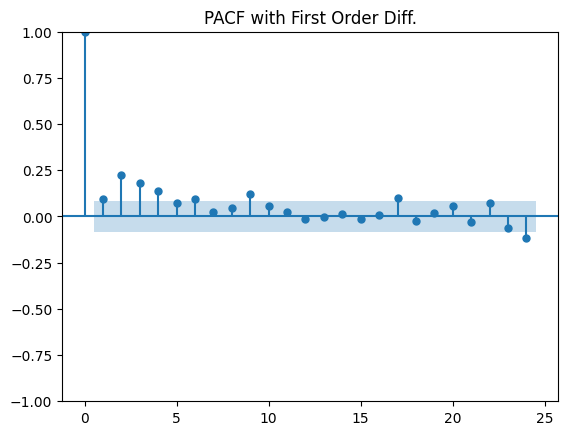

In [64]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(y["pce_diff_1"], lags=24, title = "PACF with First Order Diff.")
plt.show()

In [65]:
X.fillna(method="bfill", inplace=True)
X_train = X[:validation_start_date]
X_val = X[validation_start_date:test_start_date]
X_test = X[test_start_date:]

y_train = y[:validation_start_date]
y_val = y[validation_start_date:test_start_date]
y_test = y[test_start_date:]

In [66]:
y_train.dropna(inplace=True)
X_train = X_train.loc[y_train.index]
X_train

,pop,psavert,uempmed,unemploy,pce_lag_1,pce_diff_1_lag1,pce_diff_1_lag2,pce_diff_1_lag3,pop_lag1,pop_diff_1,...,exports,recessions,fedfunds,sp500_diff,house_diff,m2_diff,gdp_diff,cpi_diff,exports_diff,fedfunds_diff
date,,,,,,,,,,,,,,,,,,,,,
1967-07-01,198712.0,12.6,4.5,2944,506.7,3.1,3.1,3.1,198712.0,199.0,...,3.302,0.0,3.79,0.00,500.0,4.5,16.206,0.1,-1.058,0.11
1967-08-01,198911.0,12.6,4.7,2945,506.7,3.1,3.1,3.1,198712.0,199.0,...,2.244,0.0,3.90,0.00,500.0,4.5,16.206,0.1,-1.058,0.11
1967-09-01,199113.0,11.9,4.6,2958,509.8,3.1,3.1,3.1,198911.0,202.0,...,2.244,0.0,3.99,0.00,0.0,3.9,0.000,0.1,0.000,0.09
1967-10-01,199311.0,12.9,4.9,3143,515.6,5.8,3.1,3.1,199113.0,198.0,...,2.244,0.0,3.88,0.00,0.0,3.5,0.000,0.1,0.000,-0.11
1967-11-01,199498.0,12.8,4.7,3066,512.2,-3.4,5.8,3.1,199311.0,187.0,...,1.054,0.0,4.13,0.00,1000.0,3.0,27.948,0.1,-1.190,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-01-01,289518.0,5.5,9.6,8520,7512.8,53.1,29.0,39.7,289313.0,205.0,...,-525.262,0.0,1.24,-24.12,0.0,32.6,0.000,0.8,0.000,0.00
2003-02-01,289714.0,5.6,9.5,8618,7533.1,20.3,53.1,29.0,289518.0,196.0,...,-519.870,0.0,1.26,-14.55,7900.0,36.1,138.637,1.4,5.392,0.02
2003-03-01,289911.0,5.3,9.7,8588,7535.9,2.8,20.3,53.1,289714.0,197.0,...,-519.870,0.0,1.25,7.03,0.0,20.7,0.000,1.1,0.000,-0.01


# LightGBM

In [67]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
boosting_type = ["goss"]
num_leaves = [63,127,255]
max_depth = [6,7,8]
learning_rate = [0.01,0.001,0.005]
subsample = [0.6,0.8,1]
colsample_bytree = [0.6,0.8,1]
reg_alpha = [0.0, 0.1, 0.5,0.8,1]
reg_lambda = [0.0, 0.1, 0.5,0.8,1]
#reg_alpha = [0.0]
#reg_lambda = [1]
n_estimators = [500,700,900,1000,1100,1200,1300,1400,1500]
subsample_freq = [10]
seed = [42]
max_bin = [511]
early_stopping_rounds = 10


params = {'objective': ['regression'],
          'boosting_type': boosting_type,
          'num_leaves': num_leaves,
          'max_depth': max_depth,
          'learning_rate': learning_rate,
          'subsample': subsample,
          'colsample_bytree': colsample_bytree,
          'reg_alpha': reg_alpha,
          'reg_lambda': reg_lambda,
          'n_estimators': n_estimators,
          'seed' : seed,
          'max_bin' : max_bin,
          'num_iterations': [100, 200, 500,800]}

model_lgbm = lgb.LGBMRegressor()
random_search = RandomizedSearchCV(estimator=model_lgbm, param_distributions=params, cv=5,random_state=42, verbose=0, scoring="neg_root_mean_squared_error")
dataset = lgb.Dataset(X_train, y_train)
random_search.fit(dataset.data, dataset.label)
best_params_lgbm = random_search.best_params_
best_model_lgbm = random_search.best_estimator_

best_params_lgbm

{'subsample': 0.8,
 'seed': 42,
 'reg_lambda': 0.0,
 'reg_alpha': 1,
 'objective': 'regression',
 'num_leaves': 255,
 'num_iterations': 800,
 'n_estimators': 1300,
 'max_depth': 6,
 'max_bin': 511,
 'learning_rate': 0.005,
 'colsample_bytree': 0.6,
 'boosting_type': 'goss'}

In [68]:
from sklearn import svm
import xgboost as xgb
#mModel = xgb.XGBRegressor()
#mModel = RandomForestRegressor(**best_params_random)
mModel = lgb.LGBMRegressor(**best_params_lgbm)
from sklearn.linear_model import LinearRegression
#mModel = LinearRegression()
#mModel = svm.SVR()
mModel.fit(X_train, y_train)

train_preds = (pd.DataFrame(mModel.predict(X_train), index=y_train.index))
val_preds =  (pd.DataFrame(mModel.predict(X_val), index=y_val.index))
test_preds =  (pd.DataFrame(mModel.predict(X_test), index=y_test.index))
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

print(f"naive_train_RMSE: {mse(y_train, y_train.shift(1).bfill())**0.5}")
print(f"naive_val_RMSE: {mse(y_val, y_val.shift(1).bfill())**0.5}")
print(f"naive_test_RMSE: {mse(y_test, y_test.shift(1).bfill())**0.5}")
print(f"train_RMSE: {mse(train_preds, y_train)**0.5}")
print(f"train_MAE: {mae(train_preds, y_train)}")
print(f"val_RMSE: {mse(val_preds, y_val)**0.5}")
print(f"val_MAE: {mae(val_preds, y_val)}")
print(f"test_RMSE: {mse(test_preds, y_test)**0.5}")
print(f"test_MAE: {mae(test_preds, y_test)}")

import plotly.io as pio
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=train_preds.index, y=train_preds[0],  name="train_preds", line=dict(color='blue'))
)

fig.add_trace(
    go.Scatter(x=val_preds.index, y=val_preds[0],  name="val_preds", line=dict(color='cyan'))
)
fig.add_trace(
    go.Scatter(x=test_preds.index, y=test_preds[0],  name="test_preds", line=dict(color='orange'))
)
fig.add_trace(
    go.Scatter(x=pd.DataFrame(y_train).index, y=pd.DataFrame(y_train)["pce_diff_1"],  name="train_target", line=dict(color='brown'))
)
fig.add_trace(
    go.Scatter(x=pd.DataFrame(y_val).index, y=pd.DataFrame(y_val)["pce_diff_1"],  name="val_target", line=dict(color='black'))
)
fig.add_trace(
    go.Scatter(x=pd.DataFrame(y_test).index, y=pd.DataFrame(y_test)["pce_diff_1"],  name="test_target", line=dict(color='hotpink'))
)
fig.update_layout(height=600)
fig.show()

naive_train_RMSE: 31.267979514567784
naive_val_RMSE: 50.078172910578935
naive_test_RMSE: 35.62267243858435
train_RMSE: 11.850072179565082
train_MAE: 6.385213082421903
val_RMSE: 37.15400953593466
val_MAE: 25.965879924471096
test_RMSE: 30.330577941579808
test_MAE: 23.964379955569417


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

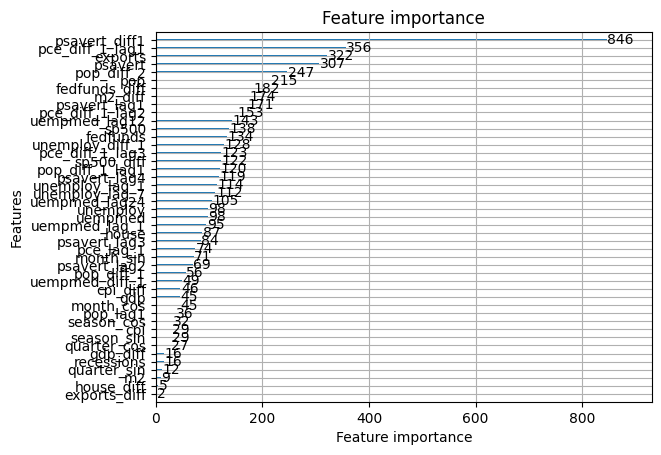

In [69]:
lgb.plot_importance(mModel)

In [70]:
data.loc['1967-07-01']['pce']

506.7

In [71]:
train_preds.loc['1967-07-01'] = data.loc['1967-07-01']['pce'] + train_preds.loc['1967-07-01']
resultant_train=np.cumsum(train_preds)
resultant_train

,0
date,
1967-07-01,510.875754
1967-08-01,515.199838
1967-09-01,524.352221
1967-10-01,524.114107
1967-11-01,529.994746
...,...
2003-01-01,7559.967941
2003-02-01,7575.159481
2003-03-01,7622.896817


In [72]:
val_preds.loc[validation_start_date] = resultant_train.loc[validation_start_date] + val_preds.loc[validation_start_date]
resultant_val = np.cumsum(val_preds)
resultant_val

,0
date,
2003-05-01,7657.213544
2003-06-01,7696.435174
2003-07-01,7697.699714
2003-08-01,7739.222080
2003-09-01,7785.818489
...,...
2011-01-01,10251.612414
2011-02-01,10264.009141
2011-03-01,10305.495719


In [73]:
test_preds.loc[test_start_date] = resultant_val.loc[test_start_date] + test_preds.loc[test_start_date]
resultant_test = np.cumsum(test_preds)
resultant_test

,0
date,
2011-05-01,10379.335227
2011-06-01,10388.251962
2011-07-01,10404.510745
2011-08-01,10429.058309
2011-09-01,10469.921992
2011-10-01,10491.781814
2011-11-01,10506.897027
2011-12-01,10514.177501
2012-01-01,10526.541853


In [74]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=resultant_train.index, y=resultant_train[0],  name="preds_train", line=dict(color='blue'))
)
fig.add_trace(
    go.Scatter(x=resultant_val.index, y=resultant_val[0],  name="preds_validation", line=dict(color='cyan'))
)
fig.add_trace(
    go.Scatter(x=resultant_test.index, y=resultant_test[0],  name="preds_test", line=dict(color='orange'))
)
fig.add_trace(
    go.Scatter(x=y_train.index, y=data['pce'][:validation_start_date],  name="train", line=dict(color='brown'))
)
fig.add_trace(
    go.Scatter(x=y_val.index, y=data['pce'][validation_start_date:test_start_date],  name="validation", line=dict(color='black'))
)
fig.add_trace(
    go.Scatter(x=y_test.index, y=data['pce'][test_start_date:],  name="test", line=dict(color='hotpink'))
)
fig.update_layout(height=600)
fig.show()

# NN

In [75]:
# normalize
import torch
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler
mScalar = StandardScaler()
mScalar.fit(X_train)
X_train_scaled = mScalar.fit_transform(X_train)
X_val_scaled = mScalar.transform(X_val)
X_test_scaled = mScalar.transform(X_test)

X_train_tensor = torch.from_numpy(X_train_scaled).float()
X_val_tensor = torch.from_numpy(X_val_scaled).float()
X_test_tensor = torch.from_numpy(X_test_scaled).float()

y_train_tensor = torch.from_numpy(y_train.values).float()/200
y_val_tensor = torch.from_numpy(y_val.values).float()/200
y_test_tensor = torch.from_numpy(y_test.values).float()/200

In [76]:
y_train_tensor.max()

tensor(0.9780)

In [77]:
class mMLP(torch.nn.Module):
    def __init__(self, input_dim, out_dim):
        super(mMLP, self).__init__()
        self.layer1 = torch.nn.Linear(input_dim, 32)
        self.layer2 = torch.nn.Linear(32, 64)
        self.layer3 = torch.nn.Linear(64, out_dim)
        #self.layer4 = torch.nn.Linear(32, out_dim)

        self.act_func = torch.nn.LeakyReLU()

    def forward(self, x_):
        out1 = self.layer1(x_)
        out1 = self.act_func(out1)

        out1 = self.layer2(out1)
        out1 = self.act_func(out1)

        out1 = self.layer3(out1)
        #out1 = self.act_func(out1)
        
        #out1 = self.layer4(out1)
        return out1


epoch    0: train_loss: 0.01758437 val_loss: 148.06042480, min_val_loss is at epoch:    0, : 148.06042480
epoch  100: train_loss: 0.00274763 val_loss: 0.06063572, min_val_loss is at epoch:   48, : 0.04996461
epoch  200: train_loss: 0.00186486 val_loss: 0.07809719, min_val_loss is at epoch:   48, : 0.04996461
epoch  300: train_loss: 0.00108017 val_loss: 0.06333869, min_val_loss is at epoch:   48, : 0.04996461
epoch  400: train_loss: 0.00117493 val_loss: 0.04814096, min_val_loss is at epoch:  384, : 0.04539979
epoch  500: train_loss: 0.00087527 val_loss: 0.05851609, min_val_loss is at epoch:  464, : 0.04082239
epoch  600: train_loss: 0.00119966 val_loss: 0.08249015, min_val_loss is at epoch:  464, : 0.04082239
epoch  700: train_loss: 0.00114793 val_loss: 0.05218436, min_val_loss is at epoch:  694, : 0.03881091
epoch  800: train_loss: 0.00162240 val_loss: 0.03930720, min_val_loss is at epoch:  755, : 0.02854785
epoch  900: train_loss: 0.00250880 val_loss: 0.04315775, min_val_loss is at ep

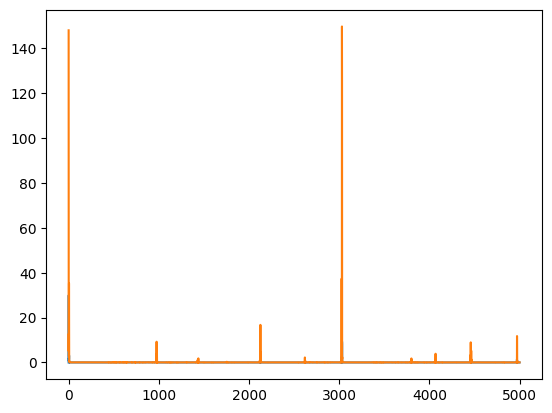

In [78]:
torch.manual_seed(66)
mModel = mMLP(input_dim=X_train_tensor.shape[1], out_dim=1)
MAX_EPOCH = 5000
mOptimizer = torch.optim.RMSprop(params=mModel.parameters(),lr=1e-2, momentum=0.5,alpha=0.985,weight_decay=1e-3)
mLoss = torch.nn.MSELoss()
val_losses_list, train_losses_list = [], []
best_model = None
min_val_loss = np.inf
for epoch_indx in range(MAX_EPOCH):
    train_preds = mModel.forward(X_train_tensor)

    
    loss = mLoss(train_preds, y_train_tensor)# + torch.linalg.norm(train_preds,1)*1e-4
    train_losses_list.append(loss.item())
    if epoch_indx % 100 == 0:
        print(f"epoch {epoch_indx:4d}: train_loss: {loss.item():.8f}", end=" ")

    mOptimizer.zero_grad()
    loss.backward()
    mOptimizer.step()

    # validation
    with torch.no_grad():
        val_preds = mModel.forward(X_val_tensor)
        val_loss = mLoss(val_preds, y_val_tensor)
        val_losses_list.append(val_loss.item())
        if epoch_indx % 100 == 0:
            min_val_loss_index = np.argmin(np.asarray(val_losses_list))
            min_val_loss = np.min(np.asarray(val_losses_list))
            print(f"val_loss: {val_loss.item():.8f}, min_val_loss is at epoch: {min_val_loss_index:4d}, : {min_val_loss:.8f}")    
        if min_val_loss > val_loss.item():
            min_val_loss = val_loss.item()
            best_model = copy.deepcopy(mModel)
plt.plot(train_losses_list)
plt.plot(val_losses_list)
plt.show()

In [79]:
with torch.no_grad():
    train_preds = best_model.forward(X_train_tensor).numpy()*200
    train_preds = pd.DataFrame(train_preds, index=X_train.index)
    val_preds = best_model.forward(X_val_tensor).numpy()*200
    val_preds = pd.DataFrame(val_preds, index=X_val.index)
    test_preds = best_model.forward(X_test_tensor).numpy()*200
    test_preds = pd.DataFrame(test_preds, index=X_test.index)

import plotly.io as pio
import plotly.graph_objects as go
print(f"naive_train_RMSE: {mse(y_train, y_train.shift(1).bfill())**0.5}")
print(f"naive_val_RMSE: {mse(y_val, y_val.shift(1).bfill())**0.5}")
print(f"naive_test_RMSE: {mse(y_test, y_test.shift(1).bfill())**0.5}")
print(f"train_RMSE: {mse(train_preds, y_train)**0.5}")
print(f"train_MAE: {mae(train_preds, y_train)}")
print(f"val_RMSE: {mse(val_preds, y_val)**0.5}")
print(f"val_MAE: {mae(val_preds, y_val)}")
print(f"test_RMSE: {mse(test_preds, y_test)**0.5}")
print(f"test_MAE: {mae(test_preds, y_test)}")

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=train_preds.index, y=train_preds[0],  name="train_preds", line=dict(color='blue'))
)

fig.add_trace(
    go.Scatter(x=val_preds.index, y=val_preds[0],  name="val_preds", line=dict(color='cyan'))
)
fig.add_trace(
    go.Scatter(x=test_preds.index, y=test_preds[0],  name="test_preds", line=dict(color='orange'))
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(y_train).index, y=pd.DataFrame(y_train)["pce_diff_1"],  name="train_target" , line=dict(color='brown'))
)
fig.add_trace(
    go.Scatter(x=pd.DataFrame(y_val).index, y=pd.DataFrame(y_val)["pce_diff_1"],  name="val_target", line=dict(color='black'))
)
fig.add_trace(
    go.Scatter(x=pd.DataFrame(y_test).index, y=pd.DataFrame(y_test)["pce_diff_1"],  name="test_target", line=dict(color='green'))
)
fig.update_layout(height=600)
fig.show()

naive_train_RMSE: 31.267979514567784
naive_val_RMSE: 50.078172910578935
naive_test_RMSE: 35.62267243858435
train_RMSE: 9.61019442393857
train_MAE: 6.858901592446041
val_RMSE: 31.075512966883437
val_MAE: 23.902417178006573
test_RMSE: 28.556288568861653
test_MAE: 21.99300021330521


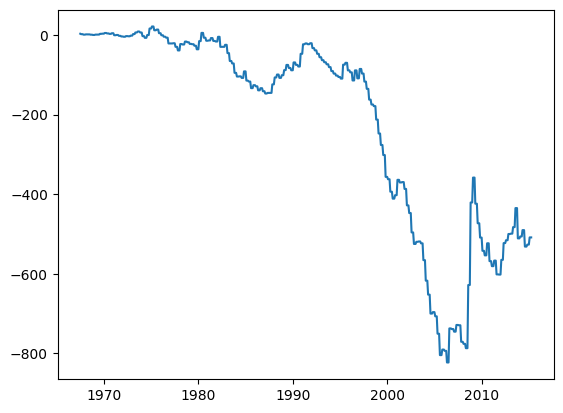

In [80]:
plt.plot(X['exports'])
plt.show()

In [81]:
train_preds.loc['1967-07-01'] = data.loc['1967-07-01']['pce'] + train_preds.loc['1967-07-01']
resultant_train=np.cumsum(train_preds)
resultant_train

,0
date,
1967-07-01,510.708466
1967-08-01,514.806580
1967-09-01,521.104248
1967-10-01,521.145752
1967-11-01,525.738770
...,...
2003-01-01,6849.987793
2003-02-01,6872.730469
2003-03-01,6912.733887


In [82]:
val_preds.loc[validation_start_date] = resultant_train.loc[validation_start_date] + val_preds.loc[validation_start_date]
resultant_val = np.cumsum(val_preds)
resultant_val

,0
date,
2003-05-01,6960.174805
2003-06-01,6984.230469
2003-07-01,6999.321777
2003-08-01,7019.199707
2003-09-01,7049.463867
...,...
2011-01-01,9997.286133
2011-02-01,10019.559570
2011-03-01,10043.934570


In [83]:
test_preds.loc[test_start_date] = resultant_val.loc[test_start_date] + test_preds.loc[test_start_date]
resultant_test = np.cumsum(test_preds)
resultant_test

,0
date,
2011-05-01,10122.313477
2011-06-01,10148.718750
2011-07-01,10172.354492
2011-08-01,10179.984375
2011-09-01,10209.739258
2011-10-01,10234.796875
2011-11-01,10253.076172
2011-12-01,10283.068359
2012-01-01,10310.768555


In [84]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=resultant_train.index, y=resultant_train[0],  name="preds_train", line=dict(color='blue'))
)
fig.add_trace(
    go.Scatter(x=resultant_val.index, y=resultant_val[0],  name="preds_validation", line=dict(color='cyan'))
)
fig.add_trace(
    go.Scatter(x=resultant_test.index, y=resultant_test[0],  name="preds_test", line=dict(color='orange'))
)
fig.add_trace(
    go.Scatter(x=y_train.index, y=data['pce'][:validation_start_date],  name="train", line=dict(color='brown'))
)
fig.add_trace(
    go.Scatter(x=y_val.index, y=data['pce'][validation_start_date:test_start_date],  name="validation", line=dict(color='black'))
)
fig.add_trace(
    go.Scatter(x=y_test.index, y=data['pce'][test_start_date:],  name="test", line=dict(color='hotpink'))
)
fig.update_layout(height=600)
fig.show()